# Pinterest dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

Matplotlib created a temporary config/cache directory at /home/aaossa/.cache/matplotlib because the default path (/tmp/matplotlib-cugu7fjm) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


### Load user interactions

### Load items features

### Raw data

In [2]:
data = pd.read_csv("data.csv")
data.head()

,user_id,item_id,timestamp
0,3,874,0
1,3,861,0
2,3,860,0
3,3,857,0
4,3,852,0


## Interactions data

In [3]:
print("Interactions shape", data.shape)

Interactions shape (410186, 3)


There are 410186 rows in the data file.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410186 entries, 0 to 410185
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    410186 non-null  int64
 1   item_id    410186 non-null  int64
 2   timestamp  410186 non-null  int64
dtypes: int64(3)
memory usage: 9.4 MB


In [5]:
data.isna().sum()

user_id      0
item_id      0
timestamp    0
dtype: int64

No missing values in this dataframe.

In [6]:
data.head()

,user_id,item_id,timestamp
0,3,874,0
1,3,861,0
2,3,860,0
3,3,857,0
4,3,852,0


In [7]:
data.describe()

,user_id,item_id,timestamp
count,4.101860e+05,4.101860e+05,410186.000000
mean,9.371217e+05,8.056408e+05,9440.866309
std,5.650198e+05,4.376258e+05,5626.558686
min,3.000000e+00,2.000000e+00,0.000000
25%,4.525970e+05,3.904298e+05,4556.000000
50%,9.125040e+05,8.600630e+05,9340.000000
75%,1.420625e+06,1.169378e+06,14203.000000
max,2.038150e+06,1.580704e+06,19822.000000


**How many users and items?**

In [8]:
print("Users:", data["user_id"].nunique())
print("Items:", data["item_id"].nunique())

Users: 19823
Items: 166526


**Number of interactions per item?**

In [9]:
items = data.groupby(["item_id"]).count()["user_id"]
items.describe()

count    166526.000000
mean          2.463195
std           2.474216
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          63.000000
Name: user_id, dtype: float64

**Most active items?**

In [10]:
most_active_items = items.sort_values(ascending=False)
most_active_items.head()

item_id
964662     63
686270     57
1329704    55
188497     54
840047     52
Name: user_id, dtype: int64

In [11]:
N = 1665  # 1%
interactions_by_active_items = most_active_items[:N].sum() / items.sum() * 100
print(f"{interactions_by_active_items:.2f} % of interactions comes from the top {N} most active items")

7.03 % of interactions comes from the top 1665 most active items


In [12]:
N = 16653  # 10%
interactions_by_active_items = most_active_items[:N].sum() / items.sum() * 100
print(f"{interactions_by_active_items:.2f} % of interactions comes from the top {N} most active items")

32.97 % of interactions comes from the top 16653 most active items


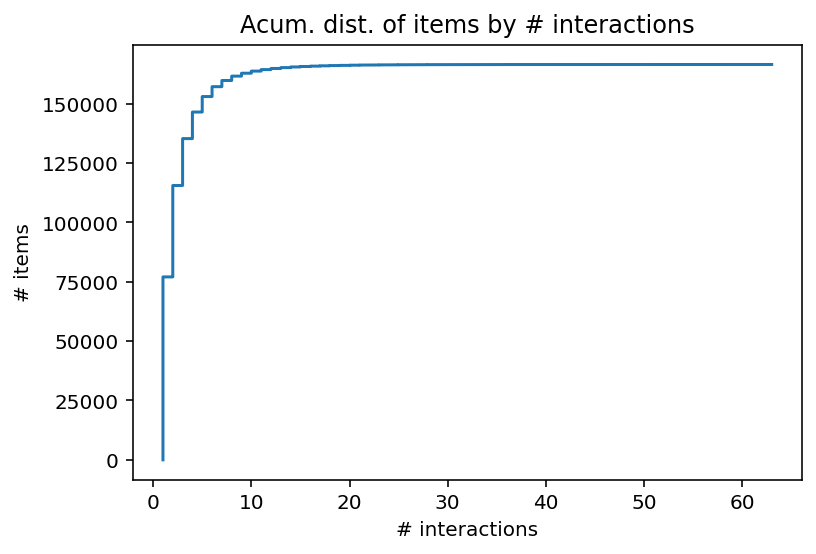

In [13]:
sorted_data = np.sort(most_active_items)
plt.step(sorted_data, np.arange(sorted_data.size))
plt.title("Acum. dist. of items by # interactions")
plt.xlabel("# interactions")
plt.ylabel("# items")
plt.show()

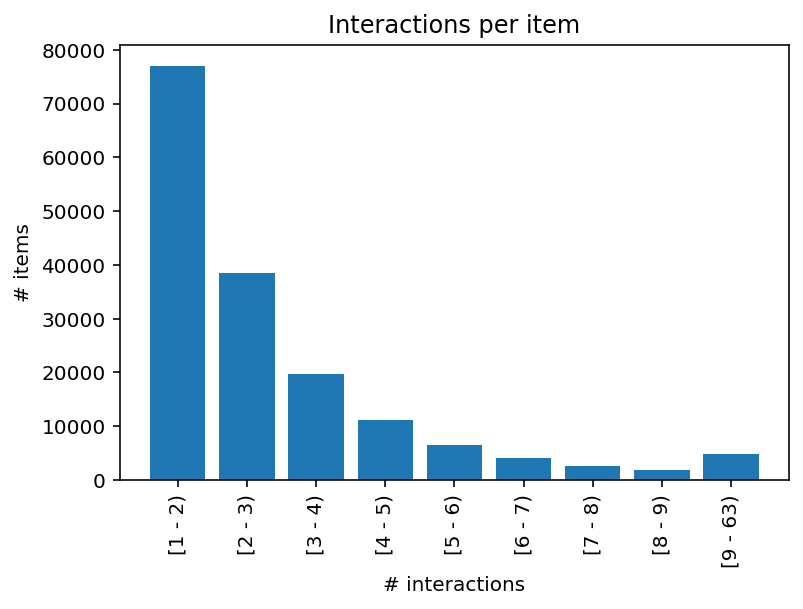

In [14]:
bins = list(range(1, 10)) + [items.max()]

hist, bins = np.histogram(items, bins)
x_axis = np.arange(0, len(hist))
plt.bar(x_axis, hist)
bin_names = [f"[{bins[i]} - {bins[i+1]})" for i in range(len(hist))]
plt.xticks(x_axis, bin_names, rotation=90)

# Title and labels
plt.title("Interactions per item")
plt.xlabel("# interactions")
plt.ylabel("# items")
plt.show()

**Number of interactions per user?**

In [15]:
users = data.groupby(["user_id"]).count()["item_id"]
users.describe()

count    19823.000000
mean        20.692428
std         50.487641
min          5.000000
25%          6.000000
50%         10.000000
75%         19.000000
max       2424.000000
Name: item_id, dtype: float64

**Most active users?**

In [16]:
most_active_users = users.sort_values(ascending=False)
most_active_users.head()

user_id
967768     2424
315754     1736
718721     1598
1745071    1484
164225     1458
Name: item_id, dtype: int64

In [17]:
N = 198  # 1%
interactions_by_active_users = most_active_users[:N].sum() / users.sum() * 100
print(f"{interactions_by_active_users:.2f} % of interactions comes from the top {N} most active users")

17.52 % of interactions comes from the top 198 most active users


In [18]:
N = 1982  # 10%
interactions_by_active_users = most_active_users[:N].sum() / users.sum() * 100
print(f"{interactions_by_active_users:.2f} % of interactions comes from the top {N} most active users")

49.30 % of interactions comes from the top 1982 most active users


In [19]:
N = 9911  # 50%
interactions_by_active_users = most_active_users[:N].sum() / users.sum() * 100
print(f"{interactions_by_active_users:.2f} % of interactions comes from the top {N} most active users")

84.23 % of interactions comes from the top 9911 most active users


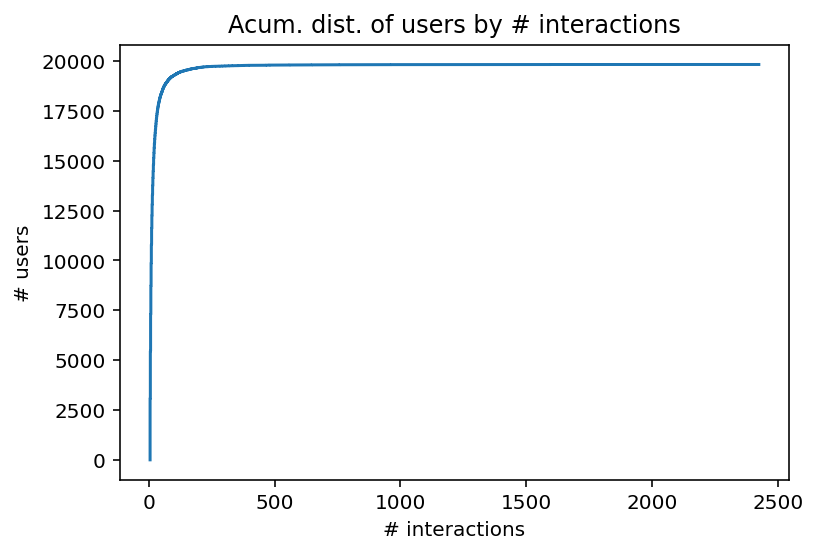

In [20]:
sorted_data = np.sort(most_active_users)
plt.step(sorted_data, np.arange(sorted_data.size))
plt.title("Acum. dist. of users by # interactions")
plt.xlabel("# interactions")
plt.ylabel("# users")
plt.show()

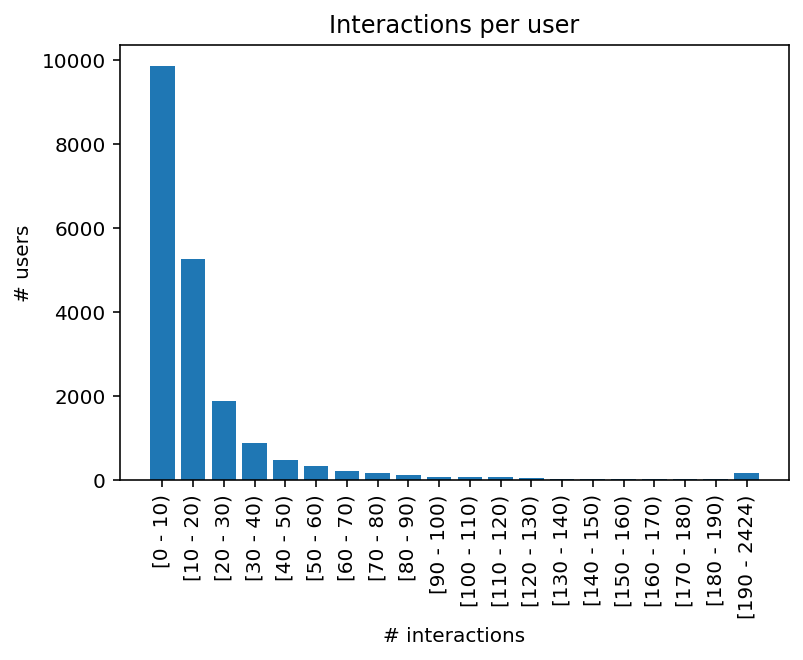

In [21]:
bins = (
    [10*i for i in range(0, 20)]
    + [users.max()]
)

hist, bins = np.histogram(users, bins)
x_axis = np.arange(0, len(hist))
plt.bar(x_axis, hist)
bin_names = [f"[{bins[i]} - {bins[i+1]})" for i in range(len(hist))]
plt.xticks(x_axis, bin_names, rotation=90)

# Title and labels
plt.title("Interactions per user")
plt.xlabel("# interactions")
plt.ylabel("# users")
plt.show()

## Output

In [22]:
n_users = data["user_id"].nunique()
n_items = data["item_id"].nunique()
print(f"Unique users: {n_users}")
print(f"Unique items 'interacted': {n_items}")
print(f"Interactions per user: {users.mean()} +/- {users.std()}")
print(f"Interactions per purchased item: {items.mean()} +/- {items.std()}")
possible_interactions = n_users * n_items
print(f"Possible interactions: {possible_interactions}")
print(f"Sparsity: {100 * len(data) / possible_interactions:2f}%")

Unique users: 19823
Unique items 'interacted': 166526
Interactions per user: 20.692427987691065 +/- 50.48764109774009
Interactions per purchased item: 2.4631949365264285 +/- 2.4742164447677264
Possible interactions: 3301044898
Sparsity: 0.012426%


In [23]:
data["artist_id"] = -1
data = data[["user_id", "item_id", "artist_id", "timestamp"]]
data = data.sort_values("timestamp")
data = data.reset_index(drop=True)


In [24]:
data.to_csv("tradesy.csv", index=False)

In [25]:
data

,user_id,item_id,artist_id,timestamp
0,3,874,-1,0
1,3,60,-1,0
2,3,63,-1,0
3,3,66,-1,0
4,3,70,-1,0
...,...,...,...,...
410181,2038150,1554002,-1,19822
410182,2038150,1434500,-1,19822
410183,2038150,1200733,-1,19822
410184,2038150,1191666,-1,19822
